# SKlearn Workshop

# 1. ETL
- load the data

# 2. EDA
- output: top three features

# 3. Feature selection/extraction
- set X, and y
- train test split

# 4. Clean data
- clean missing values
- transfer categorical values to numbers
  - label encoder and one-hot encoder(get_dummy)

# 5. Modeling
- cross validation -> grid search
- this problem is a classification problem
  - use RandomForestClassifer, SVC, LogisticRegression, GaussianNB

# 6. Testing
- `.predict`
- use from sklearn.metrics import accuracy
- use from sklearn.metrics import classification_report
  - don't worry about what is recall, precision, f1
    - i will explain later....

# 7. Feature importance
- can you try

# 8. Save models


# 1. ETL
- load the data

In [22]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
# Load csv
df = pd.read_csv("brain_stroke.csv")

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


In [25]:
print(f"Dataframe shape: {df.shape}\n")
print(f"Columns: {df.columns}\n")

Dataframe shape: (4981, 11)

Columns: Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')



# 2. EDA
- output: top three features

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4977 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [27]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4978.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.904632,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.044911,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.207500,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.850000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


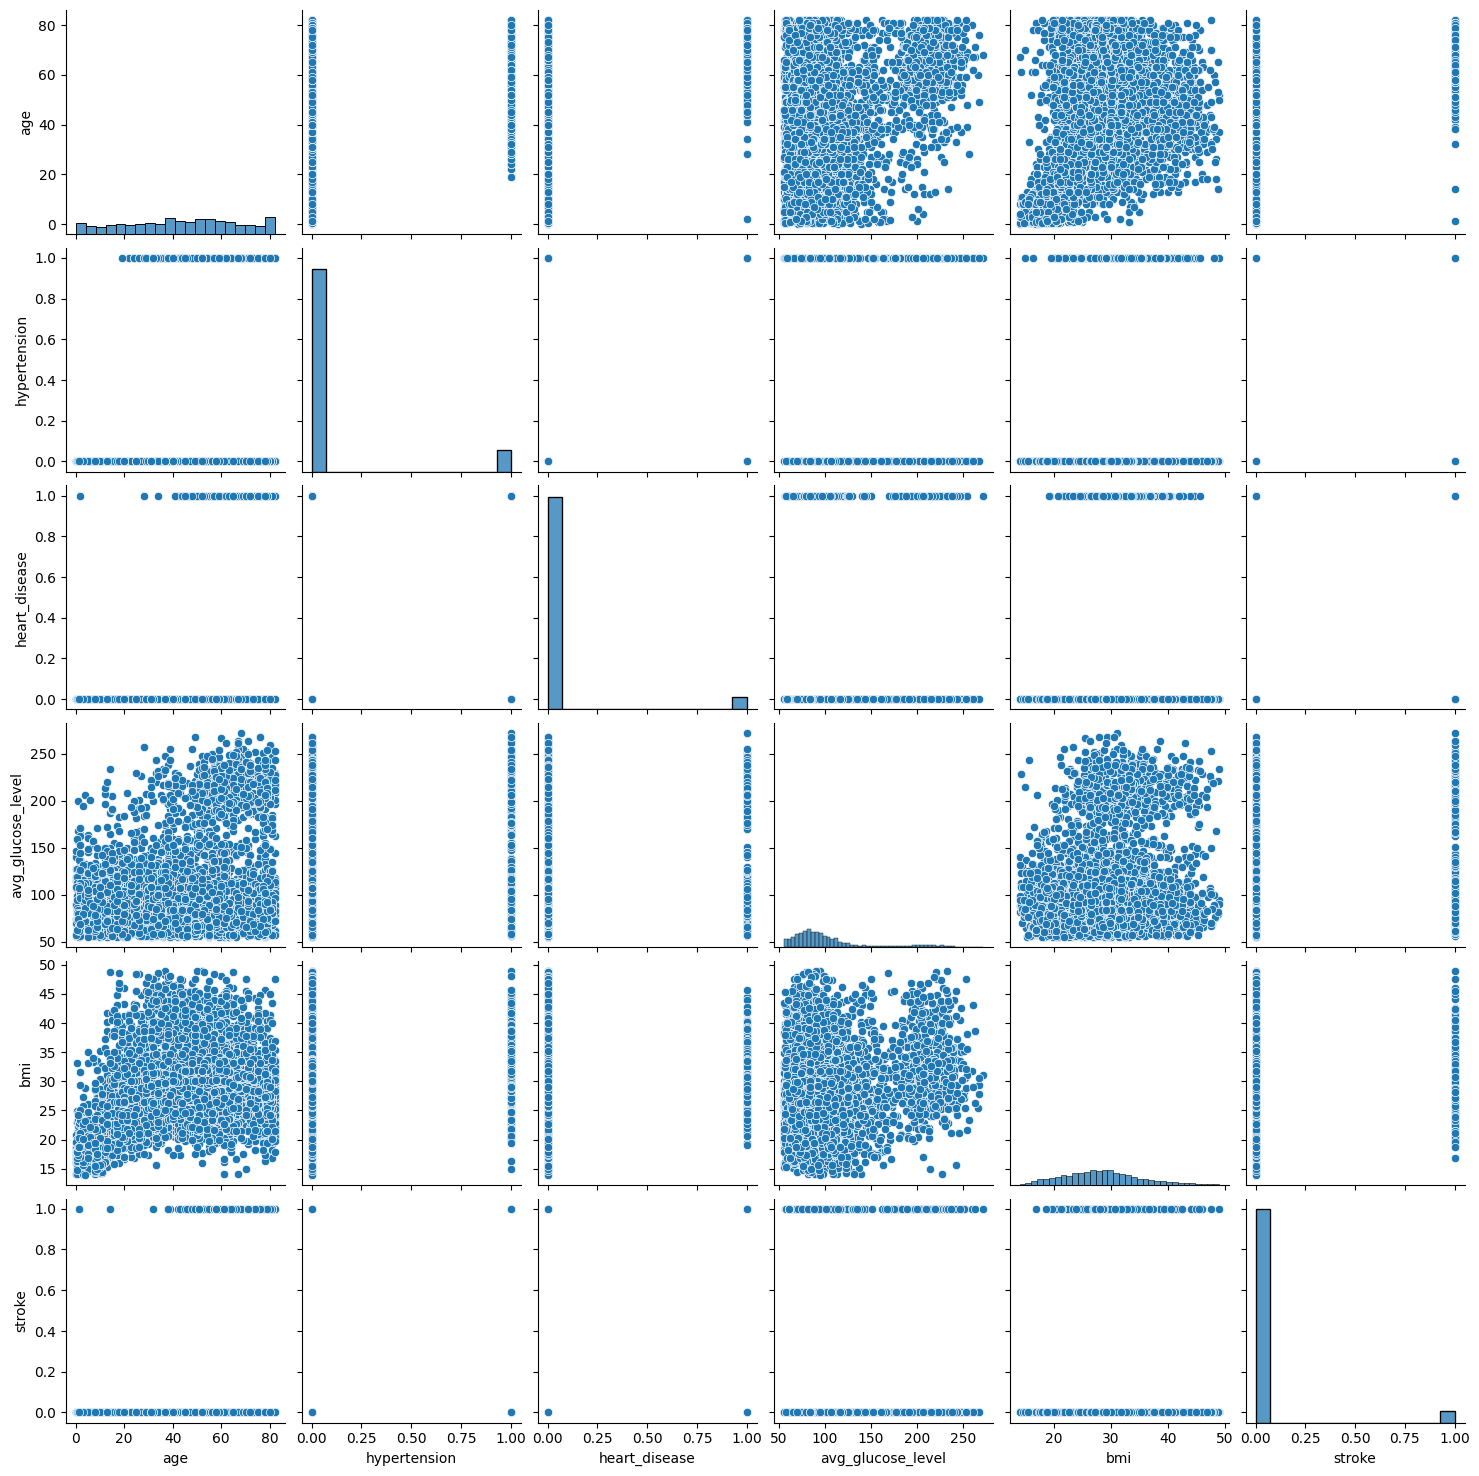

In [29]:
sns.pairplot(df)
plt.show()

### Univariate analysis

In [30]:
dis_col = df.select_dtypes(include=['object']).columns
cont_col = df.select_dtypes(include=['int64', 'float64']).columns
dis_col,cont_col

(Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'),
 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
        'stroke'],
       dtype='object'))

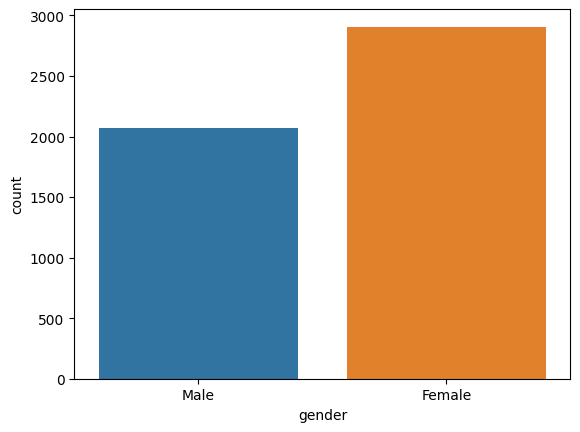

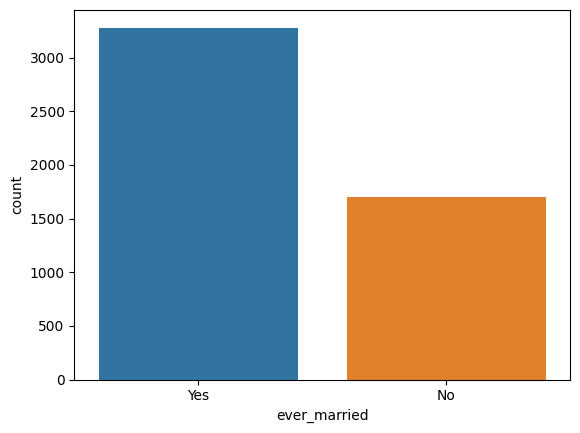

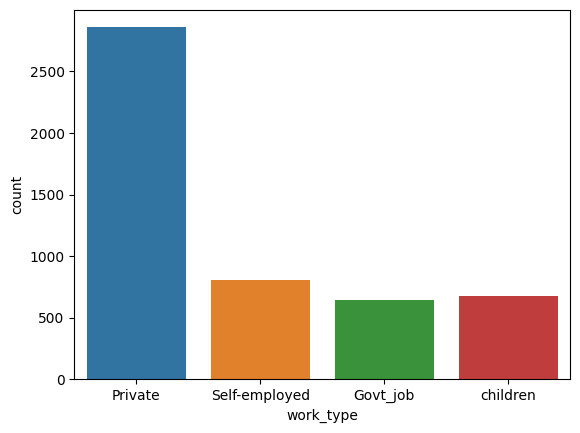

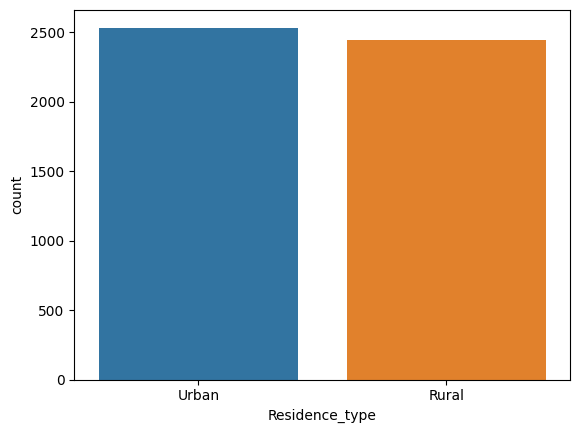

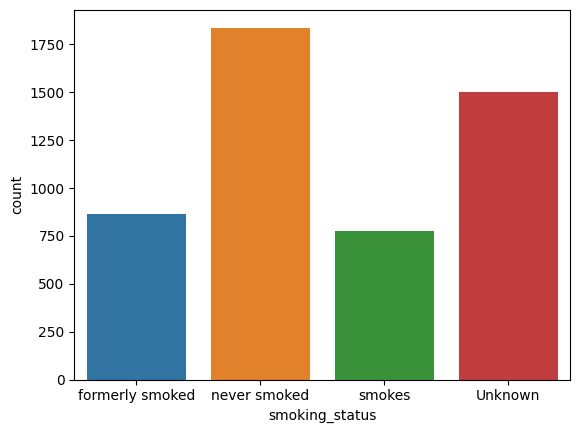

In [31]:
for col in dis_col:
    sns.countplot(data=df, x=col)
    plt.show()

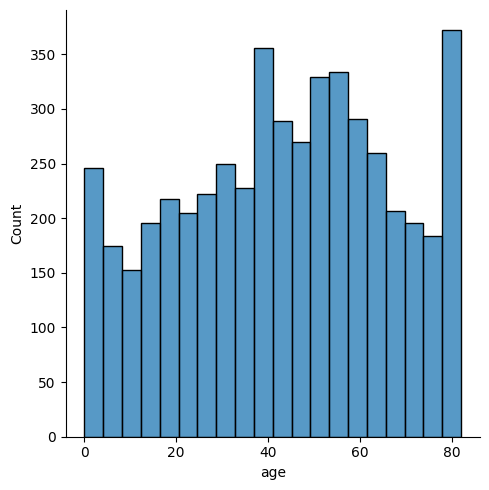

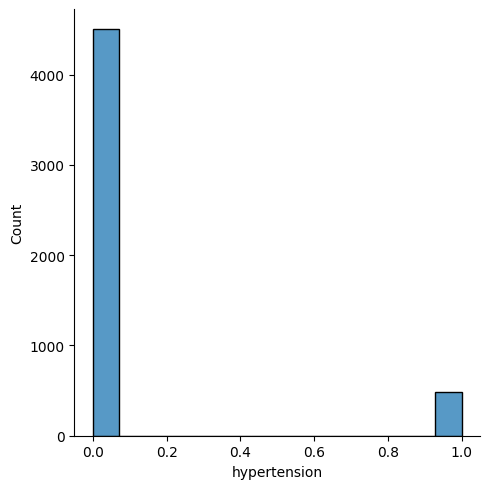

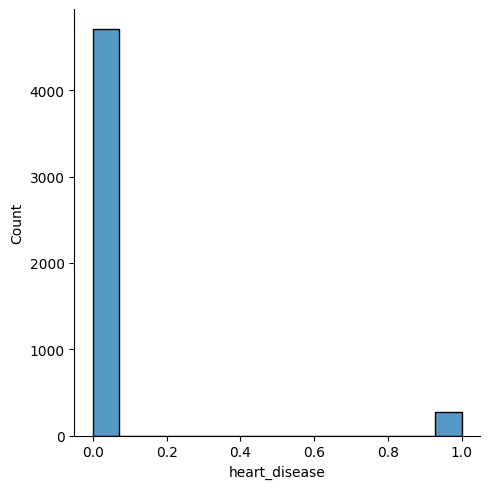

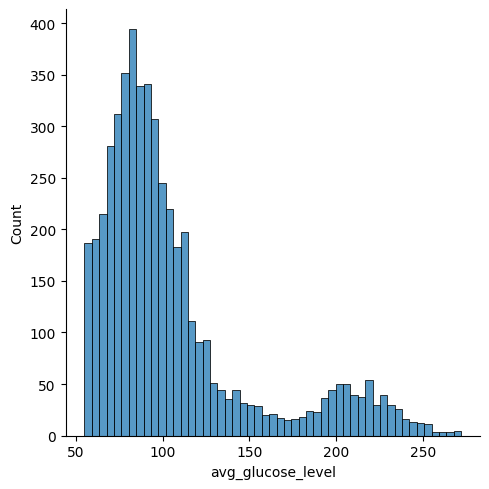

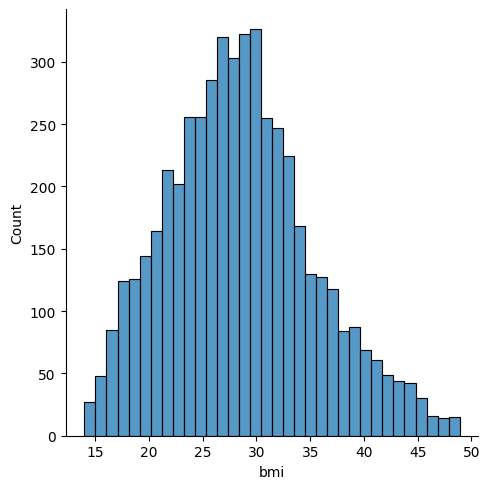

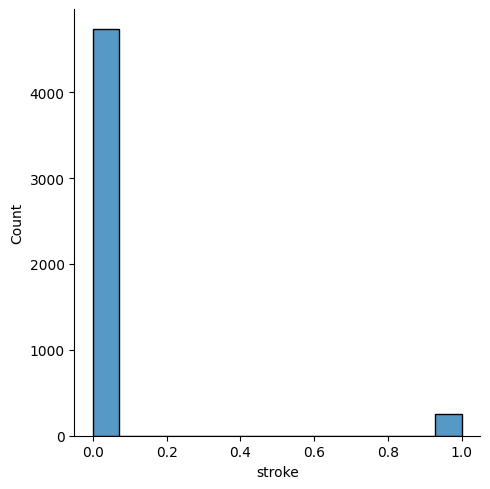

In [32]:
for col in cont_col:
    sns.displot(data=df, x=col)
    plt.show()

### Multivariate analysis

#### Check for imbalance in y

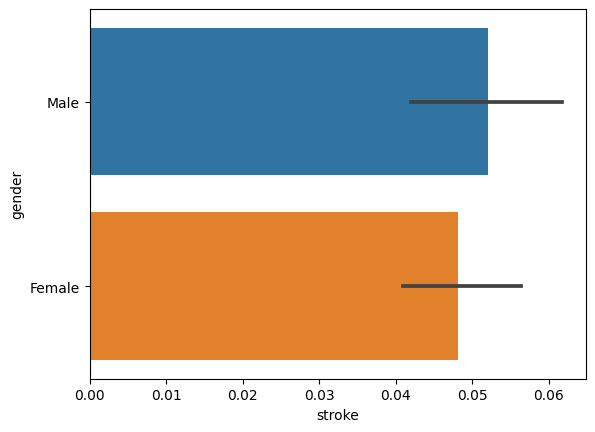

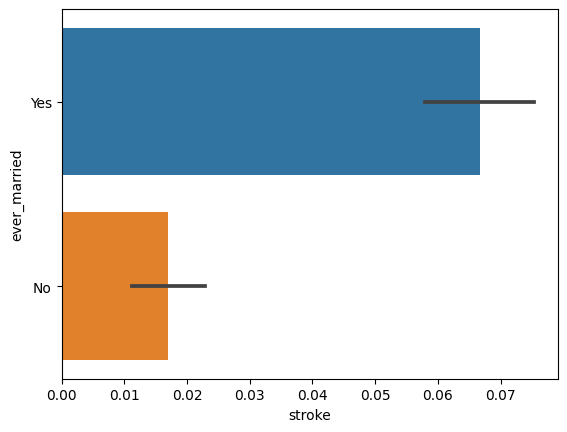

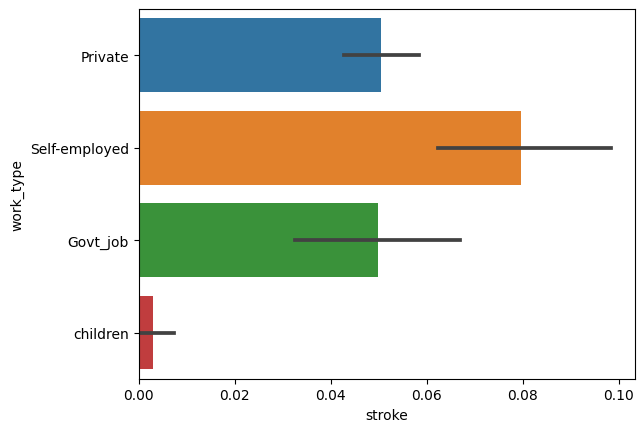

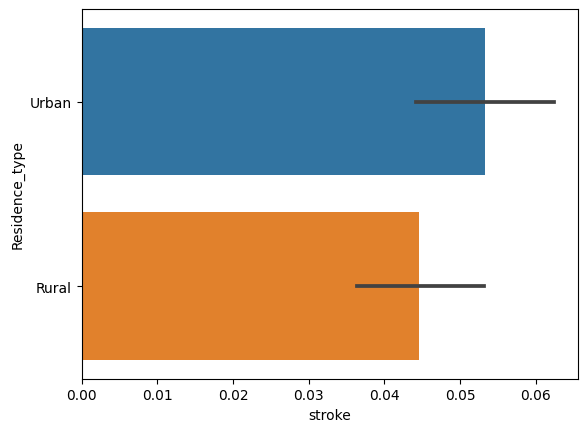

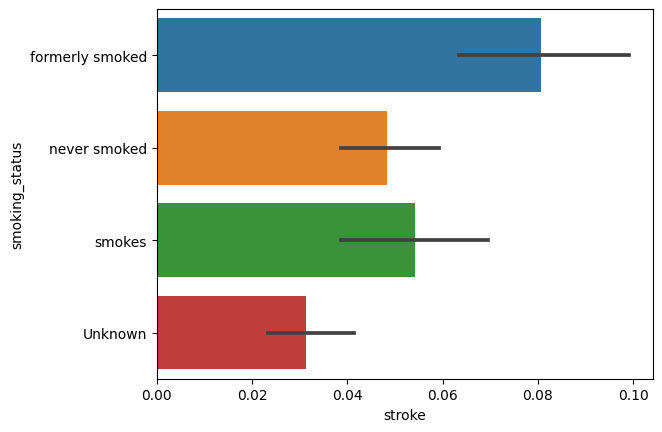

In [33]:
for col in dis_col:
    sns.barplot(x = df['stroke'], y = df[col])
    plt.show()
    
#note:  definitely not gender!

<AxesSubplot:xlabel='gender', ylabel='stroke'>

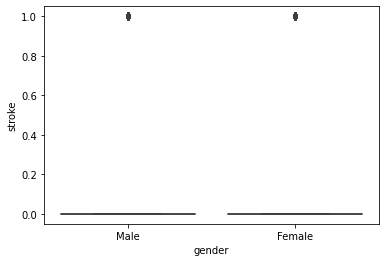

In [24]:
#sns.scatterplot(x = df['age'], y=df['stroke'])
sns.boxplot(x = df['gender'], y = df['stroke'])

<AxesSubplot:xlabel='age', ylabel='stroke'>

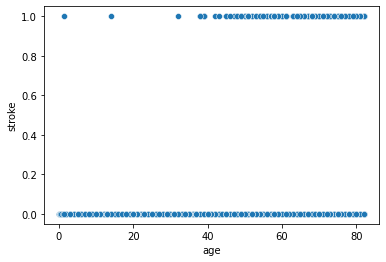

In [27]:
sns.scatterplot(x = df['age'], y=df['stroke'])
#sns.boxplot(x = df['age'], y = df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

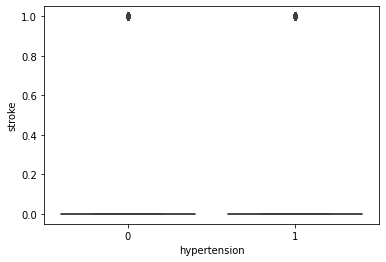

In [28]:
#sns.scatterplot(x = df['age'], y=df['stroke'])
sns.boxplot(x = df['hypertension'], y = df['stroke'])

# 3. Feature selection/extraction
- set X, and y
- train test split

In [40]:
# Features
# hypertension, heart_disease, smoking_status, avg_glucose_level
#ONLY smoking status is a problem

df = pd.get_dummies(df, columns=['smoking_status'], drop_first=True)

# Notice that one cat. of smoking ststus is gone

In [41]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,0,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,0,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,1,1,0,0


In [42]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [43]:
X = df[['age', 
        'hypertension', 
        'avg_glucose_level', 
        'smoking_status_formerly smoked', 
        'smoking_status_never smoked',
       'smoking_status_smokes']]

y = df[['stroke']]     

X.shape, y.shape

((4981, 6), (4981, 1))

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3486, 6), (1495, 6), (3486, 1), (1495, 1))

In [47]:
X_train.isna().sum()

age                               0
hypertension                      0
avg_glucose_level                 2
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [48]:
X_test.isna().sum()

age                               0
hypertension                      0
avg_glucose_level                 1
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

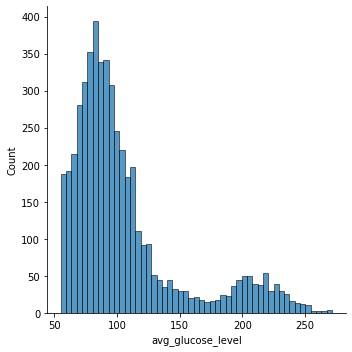

In [51]:
sns.displot(df['avg_glucose_level'])

In [54]:
X_train['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median(), inplace=True)
X_test['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median(), inplace=True)

In [56]:
assert X_train['avg_glucose_level'].isna().sum() == 0
assert X_train['avg_glucose_level'].isna().sum() == 0

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [58]:
from sklearn.model_selection import KFold


In [59]:
# Modelling -Train the model to understan the pattern
# Many Algo.
# sklearn Don't use GPU

#1. Import Algo.
from sklearn.ensemble import RandomForestRegressor
from sklearn.s
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

#SVC, LogisticRegression, GaussianNB

In [11]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [46]:
#Heatmap
# plt.figure(figsize=(10, 5))
# sns.heatmap(df.corr(), annot=True)

In [ ]:

# sns.scatterplot(x = df['battery_cap'], y=df['Price'])
# sns.boxplot(x = df['Touchscreen'], y = df['Price'])